# CSE3006 - Data Visualization
## Lab Assignment 2
### Name: Jai Gaurav
### Reg No: 21BCE7193

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing dataset

In [2]:
df = pd.read_csv("autos.csv")
df.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   make               193 non-null    object 
 2   fuel_type          193 non-null    object 
 3   aspiration         193 non-null    object 
 4   num_of_doors       193 non-null    int64  
 5   body_style         193 non-null    object 
 6   drive_wheels       193 non-null    object 
 7   engine_location    193 non-null    object 
 8   wheel_base         193 non-null    float64
 9   length             193 non-null    float64
 10  width              193 non-null    float64
 11  height             193 non-null    float64
 12  curb_weight        193 non-null    int64  
 13  engine_type        193 non-null    object 
 14  num_of_cylinders   193 non-null    int64  
 15  engine_size        193 non-null    int64  
 16  fuel_system        193 non

Extract fields for clustering

In [4]:
x = df['bore']
y = df['stroke']

Plot the points on a graph

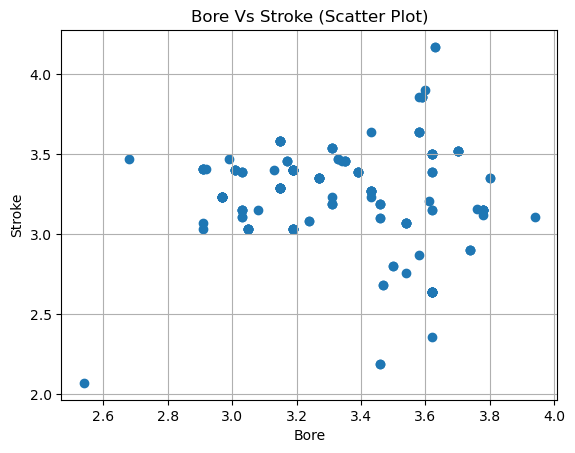

In [5]:
plt.scatter(x, y)
plt.xlabel("Bore")
plt.ylabel("Stroke")
plt.title("Bore Vs Stroke (Scatter Plot)")
plt.grid()
plt.show()

Use scipy for clustering linkage 

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [7]:
t = list(zip(x, y))

In [8]:
l_s = linkage(t, method="single", metric="euclidean")
l_c = linkage(t, method="complete", metric="euclidean")
l_a = linkage(t, method="average", metric="euclidean")
l_w = linkage(t, method="ward", metric="euclidean")

Plot the dendograms for the above linkages

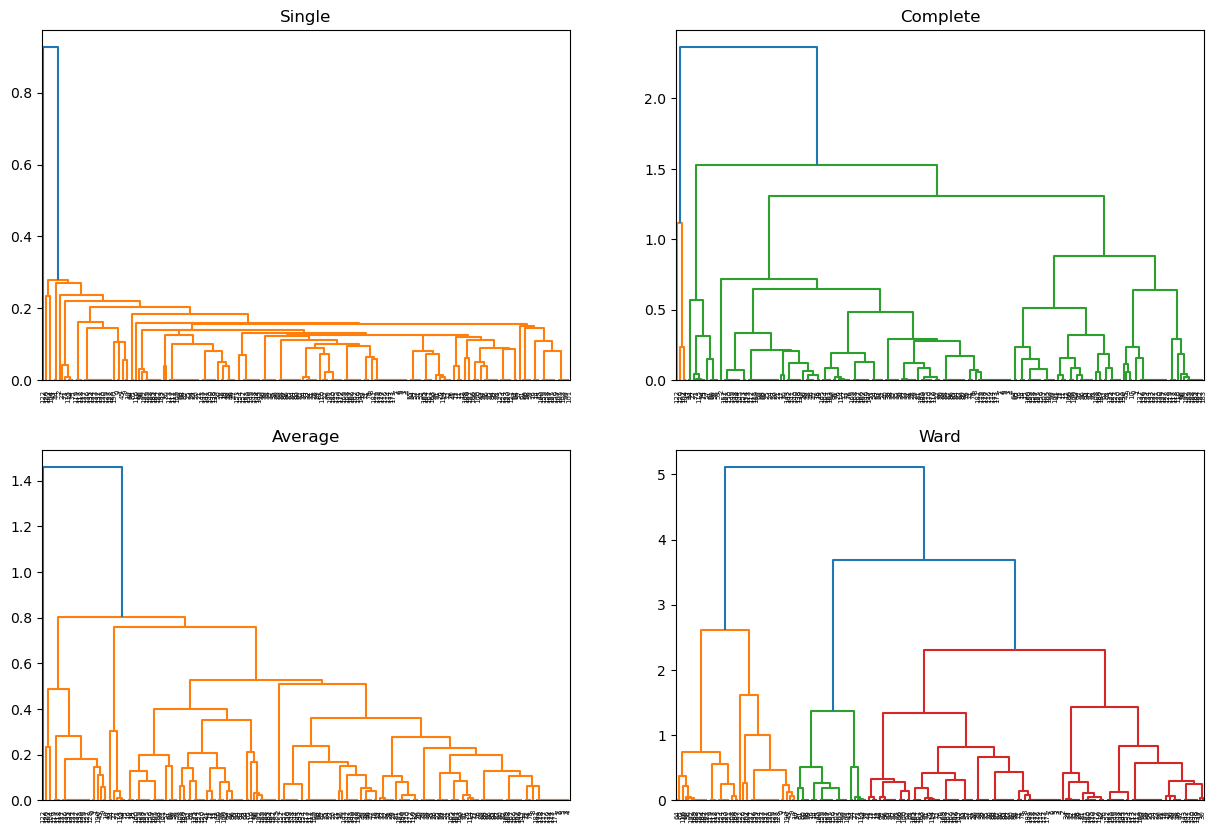

In [9]:
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1), dendrogram(l_s), plt.title('Single')
plt.subplot(2,2,2), dendrogram(l_c), plt.title('Complete')
plt.subplot(2,2,3), dendrogram(l_a), plt.title('Average')
plt.subplot(2,2,4), dendrogram(l_w), plt.title('Ward')
plt.show()

### Dendogram for distribution of characters in a string

In [10]:
def genStringDendrogram(inputString):
    charCount = dict()
    
    for char in inputString:
        charCount[char] = charCount.get(char, 0) + 1
    
    link = linkage(np.array([list(charCount.values())]).T, method='ward')
    
    print(charCount)
    
    dendrogram(link, labels=list(charCount.keys()), orientation='top', distance_sort='descending')
    plt.title('Dendrogram based on Character Frequencies')
    plt.xlabel('Characters')
    plt.ylabel('Distance')
    plt.show()

{'t': 3, 'h': 2, 'i': 4, 's': 6, ' ': 9, 'a': 2, 'r': 3, 'n': 3, 'd': 2, 'o': 5, 'm': 1, 'e': 4, 'q': 2, 'u': 2, 'c': 1, 'f': 2, 'w': 1}


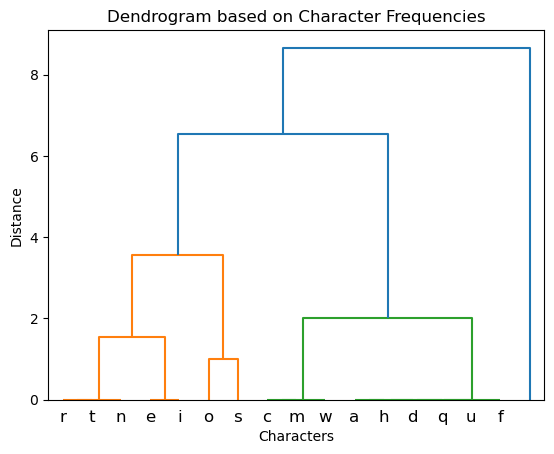

In [11]:
genStringDendrogram("this is a random sequence of words for this question")